_ATU Donegal - MSc in Data Science: Machine Learning_
**<h1>Linear, Polynomial, Multiple and Logistic Regression</h1>**

### Linear Regression
Let's create some data that shows a roughly linear (noisy) relationship between page speed and amount purchased:

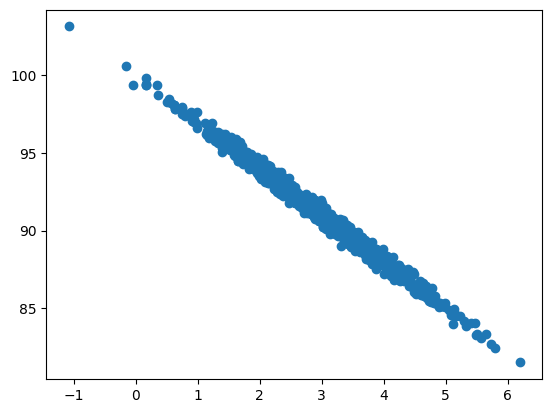

In [1]:
import numpy as np
from pylab import scatter

page_speeds = np.random.normal(3.0, 1.0, 1000)
# note sklearn expects 2d arrays - we need to use .reshape() later to do this
purchase_amount = 100 - (page_speeds + np.random.normal(0, 0.1, 1000))*3

scatter(page_speeds, purchase_amount)

In [2]:
print(page_speeds.shape)
print(purchase_amount.shape)

(1000,)
(1000,)


In [3]:
#page_speeds, purchase_amount

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = page_speeds.reshape(-1,1) # 2d array
model.fit(X, purchase_amount)
model.score(X, purchase_amount)

0.9896324724936596

We can also use other libraries to perform regression - for example, `stats.linregress` from the SciPy library:

In [5]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(page_speeds,
                                                               purchase_amount)
print(r_value**2)

0.9896324724936595


In [6]:
print(f'r_value = {r_value}')
print(f'slope = {slope}')
print(f'intercept = {intercept}')
print(f'p_value = {p_value}')
print(f'std_err = {std_err}')


r_value = -0.9948027304413973
slope = -2.9914156147182527
intercept = 99.97282096254034
p_value = 0.0
std_err = 0.009691971204685809


Not surprisingly, our R-squared value shows a really good fit. Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

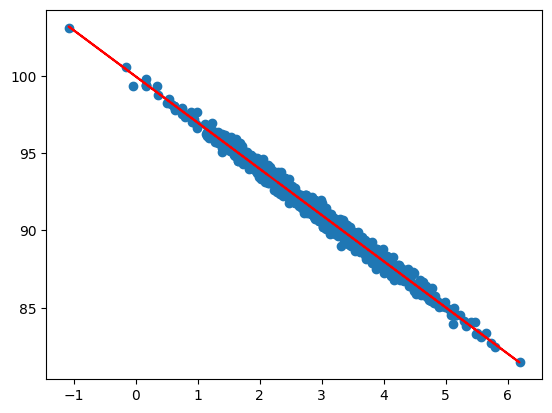

In [7]:
import matplotlib.pyplot as plt

y = model.predict(X)

plt.scatter(page_speeds, purchase_amount)
plt.plot(page_speeds, y, c='r')
plt.show()

#### Exercises
1. Try increasing the random variation in the test data, and see what effect it has on the $R^2$ value.

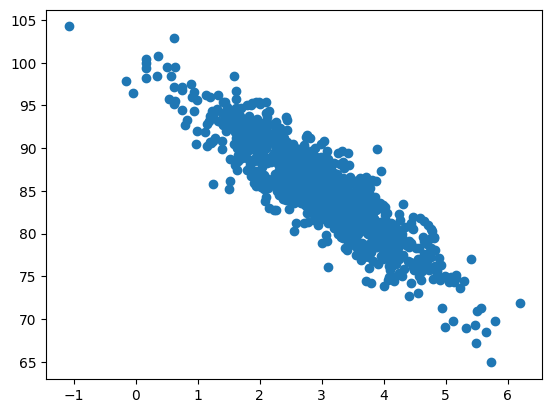

In [8]:
purchase_amount = 100 - (page_speeds + np.random.normal(0, 0.5, 1000))*5
scatter(page_speeds, purchase_amount)


2. Use  SKLearn's `model_selection.train_test_split` to create train and test splits. Fit a linear regression model on the train set and measure its performance on the test set.\*

In [9]:
# print(purchase_amount)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, purchase_amount, test_size=0.33, random_state=42)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7649969500520027

### Polynomial Regression
What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

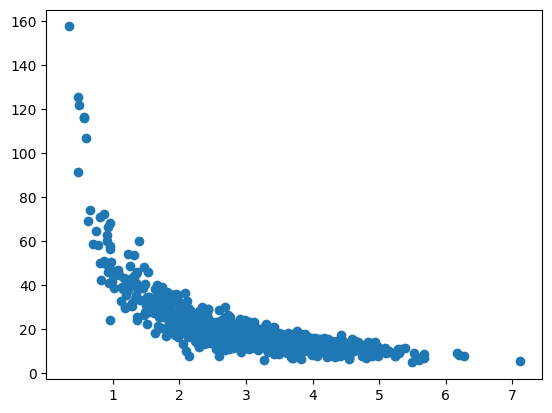

In [11]:
from pylab import scatter
import numpy as np

np.random.seed(2)
page_speeds = np.random.normal(3.0, 1.0, 1000)
purchase_amount = np.random.normal(50.0, 10.0, 1000) / page_speeds

scatter(page_speeds, purchase_amount)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)
X_poly = page_speeds.reshape(-1,1) # 2d array
X_poly = poly_features.fit_transform(X_poly)
poly_model = LinearRegression()
poly_model.fit(X_poly, purchase_amount)
poly_model.score(X_poly, purchase_amount)

0.8293766396303074

As usual, there are alternative approaches: NumPy also has a polyfit function we can use, which allows us to construct an $n^{th}$-degree polynomial model of our data that minimises squared error. Let's try it with a $4^{th}$ degree polynomial:

In [13]:
x = np.array(page_speeds)
y = np.array(purchase_amount)

p4 = np.poly1d(np.polyfit(x, y, 4))

Let's visualise our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

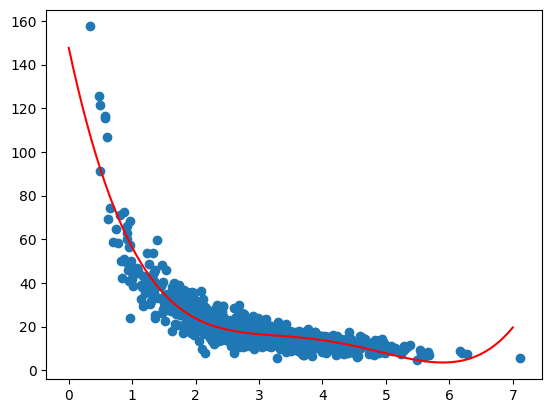

In [14]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


#### Exercise
3. Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the $R^2$ score looks good for this particular data set?

In [16]:
x = np.array(page_speeds)
y = np.array(purchase_amount)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

p10 = np.poly1d(np.polyfit(X_train, y_train, 9))
# print(p10)


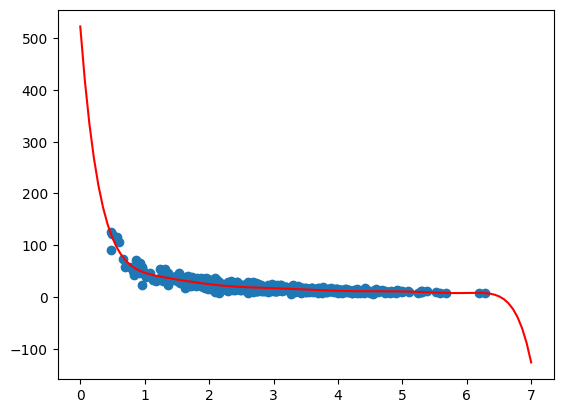

In [17]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(X_train, y_train)
plt.plot(xp, p10(xp), c='r')
plt.show()

In [18]:
r2 = r2_score(y_test, p10(X_test))

print(r2)

0.17257414269841598


### Multiple Regression
Multiple regression is used for datasets where there's more than one input/independent variable. To see how it works, we'll look at a small dataset of Blue Book car values.

In [19]:
!pip install xlrd==2.0.1
import pandas as pd

!wget https://github.com/paulgreaney/data/raw/main/cars.xls
df = pd.read_excel('cars.xls')

--2024-01-31 12:14:06--  https://github.com/paulgreaney/data/raw/main/cars.xls
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/paulgreaney/data/main/cars.xls [following]
--2024-01-31 12:14:06--  https://raw.githubusercontent.com/paulgreaney/data/main/cars.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161280 (158K) [application/octet-stream]
Saving to: ‘cars.xls’

cars.xls            100%[===================>] 157.50K  --.-KB/s    in 0.02s   

2024-01-31 12:14:07 (6.55 MB/s) - ‘cars.xls’ saved [161280/161280]



In [20]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Let's check for a relationship between mileage and price by plotting them.

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<Axes: xlabel='Mileage'>

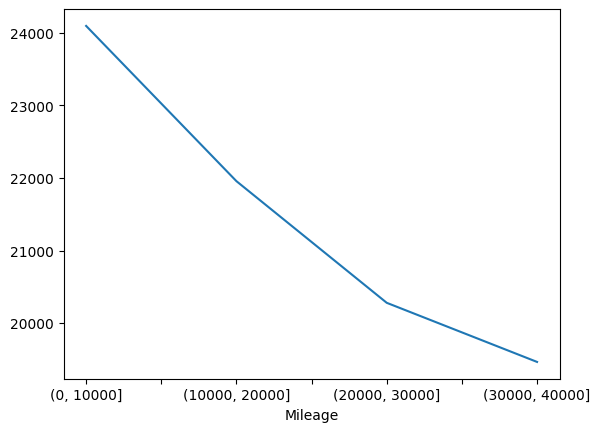

In [21]:
import numpy as np
df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups.head())
groups['Price'].plot.line()

It looks like mileage will be a pretty good feature to use as a predictor of price. We can use Pandas to split up the data frame into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding using the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

cars_X = df[['Mileage', 'Cylinder', 'Doors']]
cars_y = df['Price']
cars_X = scale.fit_transform(cars_X)
print(cars_X)

[[-1.41748516  0.52741047  0.55627894]
 [-1.30590228  0.52741047  0.55627894]
 [-0.81012759  0.52741047  0.55627894]
 ...
 [ 0.07960546  0.52741047  0.55627894]
 [ 0.75044563  0.52741047  0.55627894]
 [ 1.93256489  0.52741047  0.55627894]]


Now we create a regression model.

In [23]:
from sklearn.linear_model import LinearRegression
car_model = LinearRegression().fit(cars_X, cars_y)
car_model.score(cars_X, cars_y)

0.3600299189649302

In [57]:
car_model.coef_

array([-1272.34123307,  5587.4472163 , -1404.5513427 ])

In [59]:
car_model.intercept_

21343.143767325837

In [67]:
car_model

AttributeError: 'LinearRegression' object has no attribute 'r2_score'

Alternatively, we can use the ordinary least squares (OLS) method from the statsmodels library. This gives a nice tabular output.

In [25]:
import statsmodels.api as sm
# note the default behaviour is a model without an intercept
# so we need to add a column of ones
cars_X_intercept = sm.tools.tools.add_constant(cars_X)
est = sm.OLS(cars_y, cars_X_intercept).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.95e-77
Time:                        12:14:25   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.000    2.08e+04    2.19e+04
x1         -1272.3412    279.567     -4.551      0.000   -1821.112    -723.571
x2          5587.4472    279.527     19.989      0.000    5038.754    6136.140
x3         -1404.5513    279.446     -5.026      0.000   -1953.085    -856.018
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exercise
4. Create a regression model for the California house price dataset which uses three features. Create a train-test split and evaluate the model.*

In [26]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)



### Logistic Regression
In the lecture, we discussed logistic regression and the gradient descent approach to constructing a logistic regression model. Let's put this into practice on a dataset which records purchases on sites with ads with gender, age, and estimated salary as features.

In [27]:
import numpy as np
import pandas as pd
!wget https://github.com/paulgreaney/data/raw/main/social_network_ads.csv
social_data = pd.read_csv('social_network_ads.csv')
social_data.head()

--2024-01-31 12:14:27--  https://github.com/paulgreaney/data/raw/main/social_network_ads.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/paulgreaney/data/main/social_network_ads.csv [following]
--2024-01-31 12:14:27--  https://raw.githubusercontent.com/paulgreaney/data/main/social_network_ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘social_network_ads.csv’

social_network_ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2024-01-31 12:14:27 (104 MB/s) - ‘social_network_ads.csv’ saved [10926/10926]



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Let's map the Male and Female gender values to 0 and 1 so we can use them in regression, and then set up our `X` and `y` arrays.

In [39]:
social_data['Gender'].replace('Male', 0, inplace=True)
social_data['Gender'].replace('Female', 1, inplace=True)

X = np.array(social_data[['Gender', 'Age', 'EstimatedSalary']])
y = np.array(social_data['Purchased'])

#### Exercises
5. Create a logistic regression model using this data, with an appropriate train/test split. Then determine the best individual feature for a single-feature model and compare it with the three-feature model. Don't forget to normalise the data before training the model.*

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_model = LogisticRegression()

sc = StandardScaler() # For data Normalization
# X_sc = sc.fit_transform(X)


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state = 42)

X_train__sc = sc.fit_transform(X_train)

log_model.fit(X_train__sc,y_train)
X_test__sc = sc.transform(X_test)


normalised_score = log_model.score(X_test__sc, y_test)
normalised_score_train = log_model.score(X_train__sc,y_train)

print(normalised_score)
print(round(normalised_score_train,3))

0.8583333333333333
0.821


In [79]:
# Single feature
X = np.array(social_data[['EstimatedSalary']])
y = np.array(social_data['Purchased'])

# X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state = 10)
X_train__sc = sc.fit_transform(X_train)
X_test__sc = sc.fit_transform(X_test)

log_model.fit(X_train__sc,y_train)

round(log_model.score(X_test__sc, y_test), 3)

0.808

6. What is the effect of normalising the data on the resulting model?*

In [87]:
X = np.array(social_data[['Gender', 'Age', 'EstimatedSalary']])
y = np.array(social_data['Purchased'])

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state = 12)
lm = LogisticRegression()
lm.fit(X_train,y_train)

before_score = lm.score(X_test, y_test)

print(f"Before Normalization = {round(before_score,3)}")
print(f"After Normalization = {normalised_score}")


Before Normalization = 0.608
After Normalization = 0.8583333333333333


### Assessment
To get the marks for this lab, you should show your solution to exercises 2, 4, 5 and 6 to the lecturer.